###Formalities

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Housing prices data with few columns for convinience
import pandas as pd
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Titanic.csv")
#dataset.dropna(inplace = True)
dataset.shape

(891, 12)

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

##Data Manipulation

In [0]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
# Missing values %
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

Column-wise missing value percentage
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [0]:
dataset = dataset.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)


In [0]:
dataset.dropna(inplace = True)

In [0]:
#To convert into object (Categorical) - DO n0t convert dependant variable to object- it has to be int
dataset['Pclass'] = dataset['Pclass'].astype(object)
dataset['SibSp'] = dataset['SibSp'].astype(object)
dataset['Parch'] = dataset['Parch'].astype(object)


In [0]:
X = dataset.drop(['Choice'],axis=1)
Y = dataset['Survived']

In [0]:
#Updating date fields
#X['Age'] = 2010 - X['YearBuilt']
#X.drop(columns = ['YearBuilt'], inplace = True)

In [0]:
# # label encoding snippet 
# # label encoding will assign numerical values to each object value based on alphabetical order
# # eg. A will be encoded as 0, B - 1, C- 2
# # Helpful for High Cardinality Data - LightGBM can handle integer categorical fields

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(X['HouseStyle'])
# X['HouseStyle_LE'] = le.transform(X['HouseStyle'])

In [0]:
# # one shot one hot encoding ---- drop_first = False will do onehotencoding, true will do dummy
# pd.get_dummies(x['OverallCond'], prefix='OverallCond', drop_first=True)

In [0]:
X = pd.get_dummies(X, drop_first=True)

In [0]:
X.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# y = np.log1p(y)

In [0]:
#Train test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state=0)

##Logistic Regression

multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’

‘ovr’ = multilabel

‘multinomial’ = multiclass

‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

In [0]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
predictions = logistic.predict(X_test)

score = accuracy_score(Y_test, predictions)
print(score)
print(metrics.confusion_matrix(Y_test, predictions))

0.8181818181818182
[[72 10]
 [16 45]]


(0, 1)

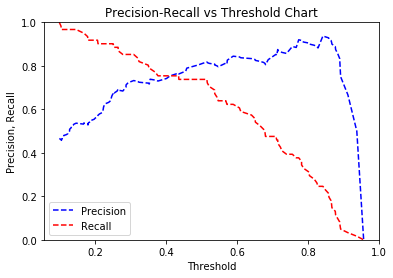

In [0]:
#Precision Recall threshold
pred_y=logistic.predict(X_test) 

probs_y=logistic.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of  array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(Y_test, probs_y[:, 1]) 

#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

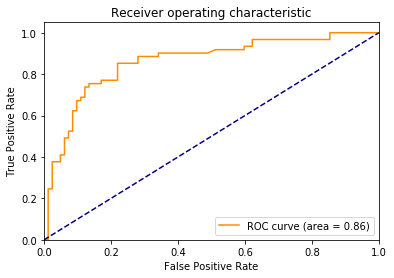

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class

y_score = logistic.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve( Y_test,y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

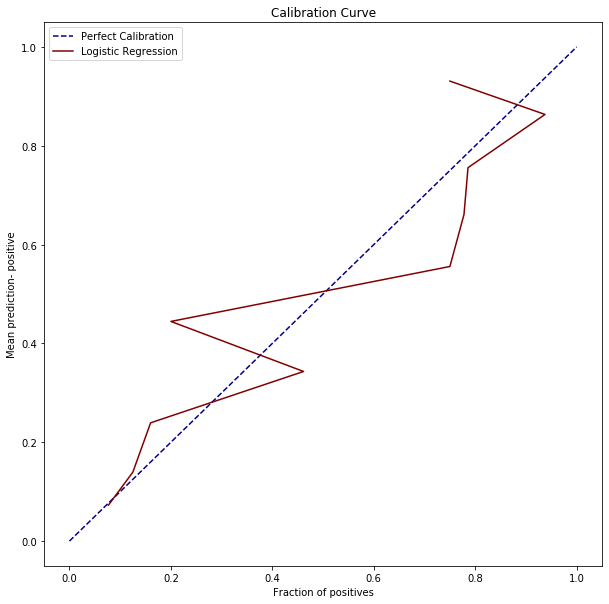

In [0]:
from sklearn.calibration import calibration_curve
fraction_pos, mean_prediction = calibration_curve(Y_test, y_score, n_bins=10)

# Calibration Curves
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], color='darkblue', label='Perfect Calibration', linestyle='--')         # Baseline
plt.plot(fraction_pos, mean_prediction, label='Logistic Regression', color='maroon')# Logistic Regression
plt.xlabel('Fraction of positives')
plt.ylabel('Mean prediction- positive')
plt.title('Calibration Curve')
plt.legend()

##QDA

In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
score = accuracy_score(Y_test, predictions)
print(score)
print(metrics.confusion_matrix(Y_test, predictions))

0.5734265734265734
[[82  0]
 [61  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


##LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Can provide priors = array in attributes
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
score = accuracy_score(Y_test, predictions)
print(score)
print(metrics.confusion_matrix(Y_test, predictions))

0.8041958041958042
[[71 11]
 [17 44]]


##kNN Classifier

In [0]:
from sklearn import preprocessing
#Scaling for distance based algos
# Standardize data - center to the mean and component wise scale to unit variance.
# careful - Normalization usually means to scale a variable to have a values between 0 and 1, 
                # while standardization transforms data to have a mean of zero and a standard deviation of 1
# apply same scaling as of train to test - best practice
x_train_scaled = X_train
scaler = preprocessing.StandardScaler().fit(x_train_scaled[['Age','Fare']])
x_train_scaled[['Age','Fare']] = scaler.transform(x_train_scaled[['Age','Fare']])

x_test_scaled = X_test
x_test_scaled[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Parameters:
# weights = 'uniform', 'distance' - Default is uniform
# metric = ‘minkowski’ or 'precomputed'
# p = 1 (manhattan), 2 (Euclidean) - Default distance is Euclidean
# Rule of thumb for choice of k is sqrt(n)/2

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(x_train_scaled, Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [0]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
predictions = neigh.predict(x_test_scaled)
score = accuracy_score(Y_test, predictions)
print(score)
print(metrics.confusion_matrix(Y_test, predictions))

0.7832167832167832
[[75  7]
 [24 37]]


##Decision Tree

Get dummies is not needed in tree based classifiers

In [0]:
#Housing prices data with few columns for convinience
import pandas as pd
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Titanic.csv")
#dataset.dropna(inplace = True)
dataset.shape

(891, 12)

In [0]:
dataset = dataset.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)
dataset.dropna(inplace = True)

In [0]:
X = dataset.drop(['Survived'],axis=1)
Y = dataset['Survived']

In [0]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le1.fit(X['Sex'])
X['Sex'] = le1.transform(X['Sex'])

#Might have to do this before the label encoding
X['Embarked'] = X['Embarked'].astype('str')
le2 = preprocessing.LabelEncoder()
le2.fit(X['Embarked'])
X['Embarked'] = le2.transform(X['Embarked'])

In [0]:
#Train test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state=0)

In [0]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
867,1,1,31.0,0,0,50.4958,2
332,1,1,38.0,0,1,153.4625,2
20,2,1,35.0,0,0,26.0000,2
606,3,1,30.0,0,0,7.8958,2
379,3,1,19.0,0,0,7.7750,2


In [0]:
#Scaling is not needed in trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Fitting the model and recording the results
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, Y_train)
pred_test = model_tree.predict(X_test)

accuracy = round(accuracy_score(pred_test, Y_test), 2)

print('Model Accuracy         : ', accuracy)
print('Misclassification Error: ', round(1-accuracy, 2))

Model Accuracy         :  0.78
Misclassification Error:  0.22


In [0]:
print(classification_report(Y_test, pred_test))

print('\nConfusion Matrix')
cmtx = pd.DataFrame(confusion_matrix(pred_test, Y_test), 
                    index=['Pred:0', 'Pred:1'], 
                    columns=['Actual:0', 'Actual:1'])
cmtx

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        82
           1       0.70      0.84      0.76        61

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.78      0.78       143


Confusion Matrix


,Actual:0,Actual:1
Pred:0,60,10
Pred:1,22,51


In [0]:
#Checking what parameters are working best
col_names =  ['max_depth', 'min_samples_split_2_to_power', 'gini_entropy', 'score']
grid  = pd.DataFrame(columns = col_names)        
for max_depth in range(1,21):
    for min_samples_split in range(1,15):
        clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=max_depth, min_samples_split=2**min_samples_split)
        clf.fit(X_train,Y_train)
        grid.loc[len(grid)] = [max_depth,min_samples_split,'gini', clf.score(X_test,Y_test)]
for max_depth in range(1,21):
    for min_samples_split in range(1,15):
        clf = DecisionTreeClassifier(random_state = 0, criterion='entropy', max_depth=max_depth, min_samples_split=2**min_samples_split)
        clf.fit(X_train,Y_train)
        grid.loc[len(grid)] = [max_depth,min_samples_split,'entropy', clf.score(X_test,Y_test)]


In [0]:
#Finding the best tree
grid.loc[grid[grid['gini_entropy']=='gini']['score'].idxmax()]
#Or exporting to check which works best
#grid.to_csv("content/drive/MyDrive/Colab Notebooks/Code Repo/Decision.csv")

max_depth                             13
min_samples_split_2_to_power           4
gini_entropy                        gini
score                           0.825175
Name: 171, dtype: object

In [0]:
#Fitting the best tree and generating a visualization
from sklearn.tree import export_graphviz

clf = DecisionTreeClassifier(random_state = 0, criterion='gini', max_depth=9, min_samples_split=2**5)
clf.fit(X_train,Y_train)
pred_test = model_tree.predict(X_test)

accuracy = round(accuracy_score(pred_test, Y_test), 2)

print('Model Accuracy         : ', accuracy)
print('Misclassification Error: ', round(1-accuracy, 2))

print(classification_report(Y_test, pred_test))

print('\nConfusion Matrix')
cmtx = pd.DataFrame(confusion_matrix(pred_test, Y_test), 
                    index=['Pred:0', 'Pred:1'], 
                    columns=['Actual:0', 'Actual:1'])
print(cmtx)        
with open("gini_best.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)
#paste the contents of the file in Webgraphviz (http://www.webgraphviz.com/)

Model Accuracy         :  0.78
Misclassification Error:  0.22
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        82
           1       0.70      0.84      0.76        61

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.78      0.78       143


Confusion Matrix
        Actual:0  Actual:1
Pred:0        60        10
Pred:1        22        51


##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

#Can add class_weight = 'balanced' for handling class imbalance automatically

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, Y_train)
print(clf.feature_importances_)

[0.25108513 0.28435193 0.12120062 0.04485265 0.06490013 0.18674563
 0.04686392]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
pred_test = clf.predict(X_test)

accuracy = round(accuracy_score(pred_test, Y_test), 2)

print('Model Accuracy         : ', accuracy)
print('Misclassification Error: ', round(1-accuracy, 2))

print(classification_report(Y_test, pred_test))

print('\nConfusion Matrix')
cmtx = pd.DataFrame(confusion_matrix(pred_test, Y_test), 
                    index=['Actual:0', 'Actual:1'], 
                    columns=['Pred:0', 'Pred:1'])
print(cmtx)        

Model Accuracy         :  0.76
Misclassification Error:  0.24
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        82
           1       0.80      0.57      0.67        61

    accuracy                           0.76       143
   macro avg       0.77      0.73      0.74       143
weighted avg       0.76      0.76      0.75       143


Confusion Matrix
          Pred:0  Pred:1
Actual:0      73      26
Actual:1       9      35


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Can add class_weight = 'balanced' for handling class imbalance automatically 
#by giving more weightage to the classes that occur less

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

print ('\n',CV_rfc.best_estimator_)



 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)


In [0]:
#To set display options to maximum
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [0]:
grid = pd.DataFrame.from_dict(CV_rfc.cv_results_)
print(grid)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.650906       0.435653      0.103609         0.000892         
1  1.401732       0.024900      0.203562         0.000158         
2  0.434370       0.007064      0.103179         0.000046         
3  1.401067       0.017456      0.203617         0.000151         
4  0.429872       0.006806      0.103152         0.000084         
5  1.392735       0.015368      0.203325         0.000106         

  param_max_features param_n_estimators  \
0  auto               200                 
1  auto               700                 
2  sqrt               200                 
3  sqrt               700                 
4  log2               200                 
5  log2               700                 

                                          params  split0_test_score  \
0  {'max_features': 'auto', 'n_estimators': 200}  0.721739            
1  {'max_features': 'auto', 'n_estimators': 700}  0.704348            
2  {'max_featur

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred_test = CV_rfc.predict(X_test)

accuracy = round(accuracy_score(pred_test, Y_test), 2)

print('Model Accuracy         : ', accuracy)
print('Misclassification Error: ', round(1-accuracy, 2))


Model Accuracy         :  0.79
Misclassification Error:  0.21


##XGBoost

##LightGBM

##CatBoost

##H2O.ai